In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow.keras

In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D

In [ ]:
from keras.layers import Dense, Flatten

In [ ]:
from keras.models import Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**IMAGE RESHAPE**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Averaging function
def Ave(lst):
    return sum(lst) / len(lst)

In [ ]:
import os
from os import listdir,makedirs
from os.path import join, exists,expanduser

In [ ]:
path="/content/drive/MyDrive/DATASET PROJECT/Reduced dataset/Train"
listdir=os.listdir(path)
ratios_sub=[]
ratios=[]

In [ ]:
import cv2

In [ ]:
for imdir in listdir:
    imlist = os.listdir(os.path.join(path, imdir))  
    for im in imlist:
        im = cv2.imread(os.path.join(path,imdir,im))
        ratio = (im.shape[0] / im.shape[1]) #height/width ratio
        ratios_sub.append((ratio))
    ratios_sub_ave=Ave(ratios_sub)
    ratios.append((ratios_sub_ave))    
ratio_ave = Ave(ratios)
print("Average ratio of width to height is {}".format(ratio_ave))

Average ratio of width to height is 0.7902775118031616


In [ ]:
width = 240
height= int(width*ratio_ave)
input_shape = ( height,width)
print(input_shape)

(189, 240)


In [ ]:
img_width, img_height = width,height 
train_data_dir = '/content/drive/MyDrive/DATASET PROJECT/Reduced dataset/Train'
validation_data_dir = '/content/drive/MyDrive/DATASET PROJECT/Reduced dataset/Test'

numberOfClass=5
batch_size = 5
epochs=20

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.95,zoom_range=0.95,horizontal_flip=True,vertical_flip=True) 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_height, img_width),batch_size=batch_size,class_mode='categorical')

Found 1452 images belonging to 5 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_height, img_width),batch_size=batch_size,class_mode='categorical')

Found 125 images belonging to 5 classes.


In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( img_height,img_width, 3))
vgg_layer_list = vgg.layers

In [ ]:
#Initialising the CNN
model = Sequential ()

In [ ]:
for layer in vgg_layer_list:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Activation, Dropout

In [ ]:
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0))

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0))

In [ ]:
model.add(Dense(numberOfClass))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 189, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 189, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 94, 120, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 94, 120, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 94, 120, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 47, 60, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 47, 60, 256)      

In [ ]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

**CNN TRAINING**

In [ ]:
hist = model.fit_generator(generator=train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


226/291 [======================>.......] - ETA: 7s - loss: 1.9448 - accuracy: 0.3381

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


291/291 [==============================] - 36s 121ms/step - loss: 1.8018 - accuracy: 0.3664 - val_loss: 1.1969 - val_accuracy: 0.5040
Epoch 2/20
291/291 [==============================] - 34s 117ms/step - loss: 1.1394 - accuracy: 0.5523 - val_loss: 1.2614 - val_accuracy: 0.5040
Epoch 3/20
291/291 [==============================] - 34s 118ms/step - loss: 1.0861 - accuracy: 0.5771 - val_loss: 1.0480 - val_accuracy: 0.6480
Epoch 4/20
291/291 [==============================] - 34s 117ms/step - loss: 0.9578 - accuracy: 0.6384 - val_loss: 0.8754 - val_accuracy: 0.7120
Epoch 5/20
291/291 [==============================] - 34s 118ms/step - loss: 0.8825 - accuracy: 0.6722 - val_loss: 0.8848 - val_accuracy: 0.7520
Epoch 6/20
291/291 [==============================] - 34s 117ms/step - loss: 0.8496 - accuracy: 0.6722 - val_loss: 0.9645 - val_accuracy: 0.7040
Epoch 7/20
291/291 [==============================] - 34s 118ms/step - loss: 0.8524 - accuracy: 0.6756 - val_loss: 0.7557 - val_accuracy: 0.7

In [ ]:
import matplotlib.pyplot as plt


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


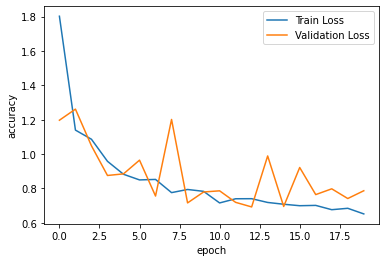

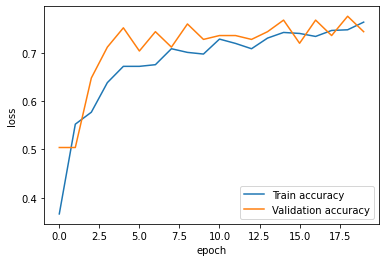

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# save model and architecture to single file
model.save('/content/drive/MyDrive/PROJECT1SAVEFILE/FDPCNN1.h5')
model.summary()
print("Saved model to disk")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 189, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 189, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 94, 120, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 94, 120, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 94, 120, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 47, 60, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 47, 60, 256)      

In [ ]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/PROJECT1SAVEFILE/FDPCNN1.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 189, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 189, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 94, 120, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 94, 120, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 94, 120, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 47, 60, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 47

In [ ]:
from keras.utils.vis_utils import plot_model

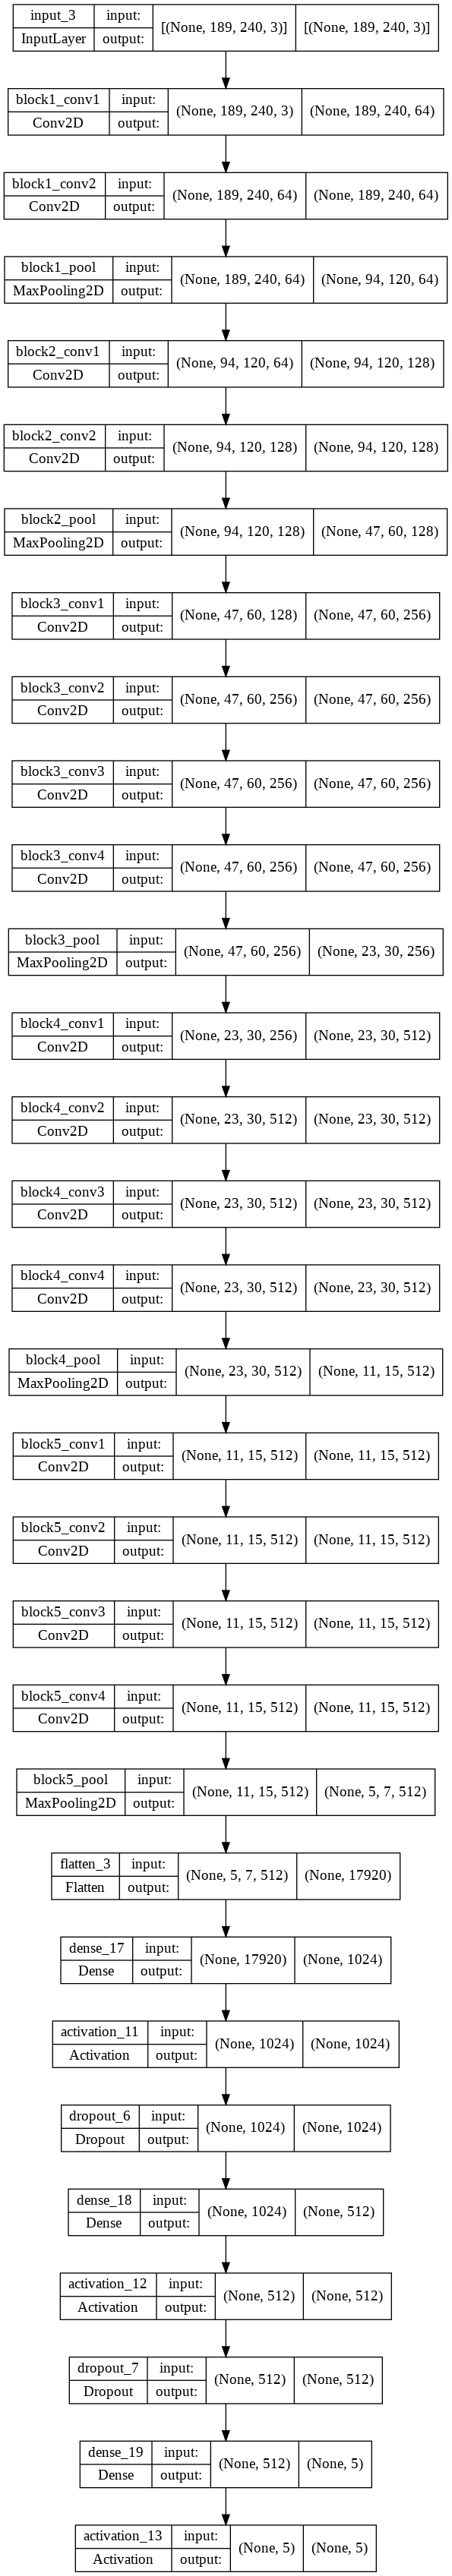

In [ ]:
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)
#

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2r2r.jpg to 2r2r (1).jpg


In [ ]:
# Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/2r2r.jpg', target_size = (189, 240))
test_image1 = image.img_to_array(test_image)
test_image1 = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image1)
print(result)
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'The given logo is hyundai'
    print(prediction)
elif[1][0]==2:
    prediction = 'The given logo is Mazda'
    print(prediction)
elif[2][0]==3:
    prediction = 'The given logo is Mercedes'
    print(prediction)
elif[3][0]==4:
    prediction = 'The given logo is toyota'
    print(prediction)
elif[4][0]==5:
    prediction = 'The given logo is volkswagen'
    print(prediction)

ValueError: ignored

**Image Processing (week 2nd task)**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

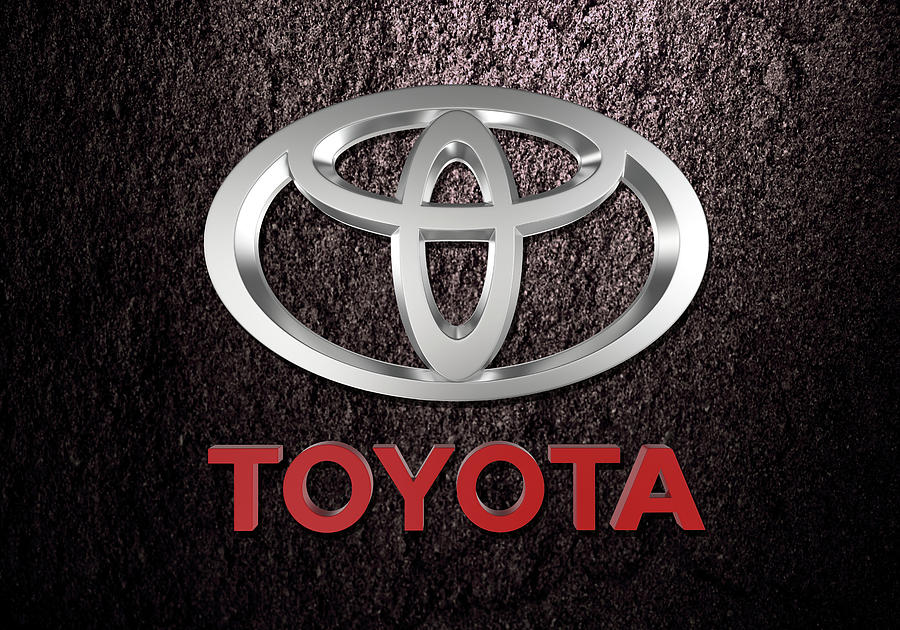

Original Dimensions :  (630, 900, 3)


In [ ]:
img = cv2.imread('/content/12-toyota-logo-martin-britt.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
print('Original Dimensions : ',img.shape)

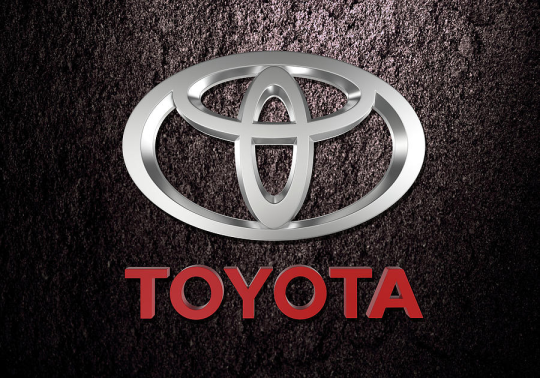

Resized Dimensions :  (378, 540, 3)


In [ ]:
#reshape/resize the image
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)
print('Resized Dimensions : ',resized.shape)

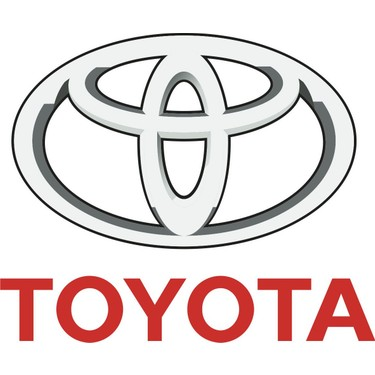

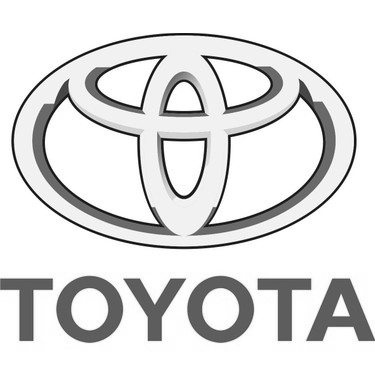

In [ ]:
img2=cv2.imread('/content/11077057642546.jpg')
cv2_imshow(img2)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
cv2.imwrite('/content/drive/MyDrive/DATASET PROJECT/gray.png',gray)


True

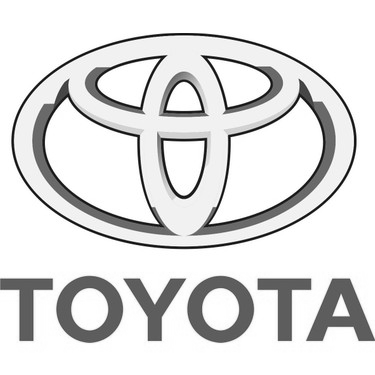

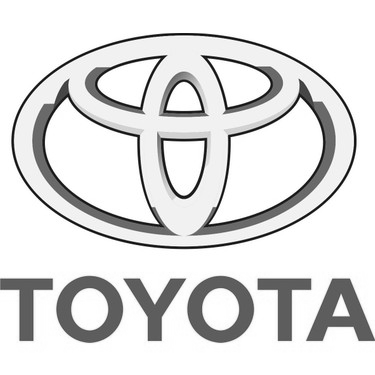

(375, 375, 3)

In [ ]:
img3=cv2.imread('/content/drive/MyDrive/DATASET PROJECT/gray.png')
cv2_imshow(img3)
img3.shape
backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
cv2_imshow(backtorgb)
backtorgb.shape

Normalization

Original image


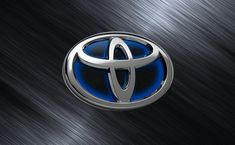

Normalized image


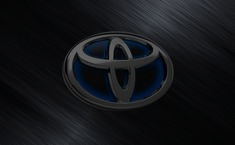

In [ ]:
imageread = cv2.imread('/content/6dbc0becd054e3716824a5c7b72e75e9.jpg')
print("Original image")
cv2_imshow(imageread)
resultimage = np.zeros((800, 800))
normalizedimage = cv2.normalize(imageread,resultimage, 0, 100, cv2.NORM_MINMAX)
print("Normalized image")
cv2_imshow(normalizedimage)

In [ ]:
from matplotlib import pyplot as plt

Histogram of original image


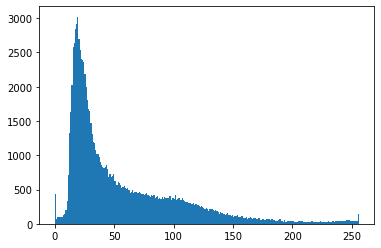

In [ ]:
print("Histogram of original image")
plt.hist(imageread.ravel(),256,[0,256])
plt.show()

Histogram of normalize image


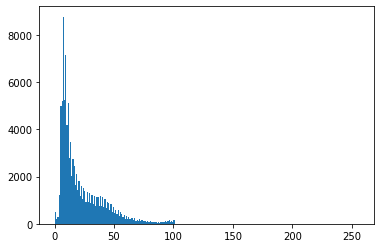

In [ ]:
print("Histogram of normalize image")
plt.hist(normalizedimage.ravel(),256,[0,256])
plt.show()

matrix of an image

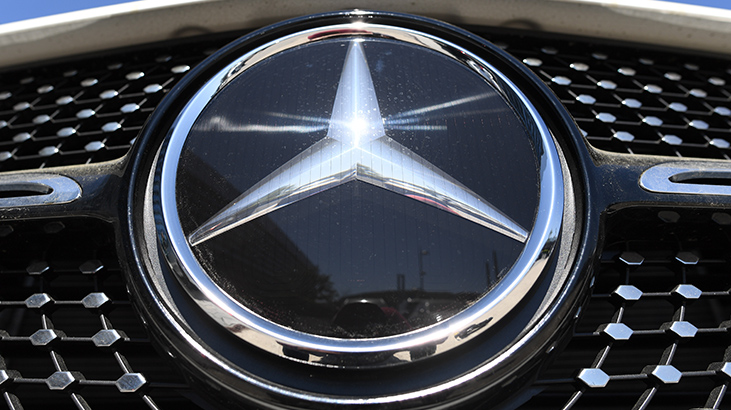

array([[[219, 146, 108],
        [219, 146, 108],
        [219, 146, 108],
        ...,
        [218, 143, 105],
        [218, 143, 105],
        [218, 143, 105]],

       [[219, 146, 108],
        [219, 146, 108],
        [219, 146, 108],
        ...,
        [216, 143, 105],
        [216, 143, 105],
        [216, 143, 105]],

       [[219, 146, 108],
        [219, 146, 108],
        [219, 146, 108],
        ...,
        [216, 143, 105],
        [216, 143, 105],
        [216, 143, 105]],

       ...,

       [[  1,   3,   4],
        [  3,   2,   4],
        [  4,   3,   5],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 12,  12,  12]],

       [[  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 15,  15,  15],
        [ 14,  14,  14],
        [ 14,  14,  14]]

In [ ]:
from PIL import Image
from numpy import array

im_1 = cv2.imread(r"/content/mrc36.jpg")
cv2_imshow(im_1)
ar = array(im_1)
ar

**TASK 3**

In [ ]:
!pip3 install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 as cv
import glob2 as gl

In [ ]:
import os
from google.colab.patches import cv2_imshow

In [ ]:
os.mkdir('/content/drive/MyDrive/DATASET PROJECT/GrayScale_Images')

In [ ]:
images_path=gl.glob('/content/drive/MyDrive/DATASET PROJECT/Reduced dataset/Train/mercedes/*.jpg')
i=0
for image in images_path:
  img=cv.imread(image)
  gray_images=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  cv2_imshow(gray_images)
  cv.imwrite('/content/drive/MyDrive/DATASET PROJECT/GrayScale_Images/image%02i.jpg' %i,gray_images)
  i+=1
  cv.waitKey(600)
  cv.destroyAllWindows()